In [1]:
import numpy as np
from scipy.sparse.linalg import gmres
import time
import matplotlib.pyplot as plt

In [2]:
def create_problem(n=100):
    """Create a sample problem: Ax = b"""
    # Create a random positive definite matrix
    A = np.random.randn(n, n)
    A = A @ A.T + n * np.eye(n)  # Make it positive definite
    
    # Create true solution
    x_true = np.random.randn(n)
    
    # Create right-hand side
    b = A @ x_true
    
    return A, b, x_true

In [3]:
def build_krylov_basis(A, b, k):
    """Build orthonormal basis for Krylov subspace"""
    n = len(b)
    Q = np.zeros((n, k))
    H = np.zeros((k, k))
    
    # Initialize first basis vector
    Q[:, 0] = b / np.linalg.norm(b)
    
    # Arnoldi iteration
    for j in range(k-1):
        # Compute next vector
        v = A @ Q[:, j]
        
        # Orthogonalize against previous vectors (Gram-Schmidt)
        for i in range(j+1):
            H[i, j] = Q[:, i] @ v
            v = v - H[i, j] * Q[:, i]
            
        # Add new normalized vector to basis
        H[j+1, j] = np.linalg.norm(v)
        if H[j+1, j] < 1e-12:
            return Q[:, :j+1], H[:j+1, :j+1]
        Q[:, j+1] = v / H[j+1, j]
    
    return Q, H

In [4]:
def solve_with_krylov(A, b, k):
    """Solve system using Krylov subspace method"""
    # Build Krylov basis
    Q, H = build_krylov_basis(A, b, k)
    
    # Solve reduced system
    y = np.linalg.solve(Q.T @ A @ Q, Q.T @ b)
    
    # Project back to original space
    x = Q @ y
    
    return x

In [5]:
n = 100  # Size of system
A, b, x_true = create_problem(n)

In [6]:
start_time = time.time()
x_direct = np.linalg.solve(A, b)
direct_time = time.time() - start_time
direct_error = np.linalg.norm(x_direct - x_true) / np.linalg.norm(x_true)

In [7]:
k = 20   # Size of Krylov subspace

In [8]:
start_time = time.time()
x_krylov = solve_with_krylov(A, b, k)
krylov_time = time.time() - start_time
krylov_error = np.linalg.norm(x_krylov - x_true) / np.linalg.norm(x_true)

In [9]:
x_direct

array([-0.81443695,  0.9328175 ,  0.0190346 ,  0.4941505 , -0.35819976,
       -1.73906567,  0.49290254,  0.62415478,  1.24128367,  1.22133079,
       -0.53930037,  0.28227021, -1.3177053 , -0.95935665,  1.40861647,
       -1.47231566, -0.64207524, -1.63859273, -0.59370711, -0.10295743,
        0.95423538, -1.29903   , -0.51725685, -2.0316175 ,  1.31316859,
        0.60040751,  1.76717228,  0.90882735, -0.35585065, -1.30260695,
       -0.63208785, -0.09125191,  1.99781246,  1.04794554, -0.25973525,
        1.57729779,  0.08917271,  0.52489393,  0.79596191, -0.49937923,
        0.90796311, -0.63906224,  0.69596994, -0.39147115, -1.3484812 ,
       -0.73623446,  0.41885349, -0.31401092,  2.61130834, -1.2332841 ,
       -0.49436352, -0.40057617,  0.0460394 , -0.12534883,  0.43039097,
        2.35746993,  0.85770779,  0.74524275, -2.42614472,  0.24570114,
       -0.30427064, -1.03383766, -1.50218594, -1.61052388,  0.43469497,
        1.45619278,  1.0438036 ,  2.2860203 ,  0.02840408, -0.44

In [10]:
x_krylov

array([-0.81443695,  0.9328175 ,  0.0190346 ,  0.4941505 , -0.35819975,
       -1.73906567,  0.49290254,  0.62415478,  1.24128367,  1.22133079,
       -0.53930037,  0.2822702 , -1.31770529, -0.95935665,  1.40861647,
       -1.47231566, -0.64207524, -1.63859273, -0.59370711, -0.10295743,
        0.95423538, -1.29902999, -0.51725685, -2.0316175 ,  1.31316859,
        0.60040751,  1.76717228,  0.90882735, -0.35585065, -1.30260695,
       -0.63208785, -0.09125191,  1.99781245,  1.04794555, -0.25973525,
        1.57729779,  0.08917271,  0.52489392,  0.79596191, -0.49937923,
        0.90796311, -0.63906224,  0.69596994, -0.39147115, -1.3484812 ,
       -0.73623446,  0.41885349, -0.31401092,  2.61130834, -1.2332841 ,
       -0.49436352, -0.40057617,  0.0460394 , -0.12534883,  0.43039097,
        2.35746994,  0.85770779,  0.74524275, -2.42614472,  0.24570114,
       -0.30427064, -1.03383766, -1.50218594, -1.61052388,  0.43469497,
        1.45619278,  1.0438036 ,  2.2860203 ,  0.02840408, -0.44

In [11]:
def analyze_solutions(x_direct, x_krylov):
    """Analyze differences between direct and Krylov solutions"""
    # Compute various error metrics
    absolute_diff = np.abs(x_direct - x_krylov)
    relative_diff = absolute_diff / (np.abs(x_direct) + 1e-10)  # Avoid division by zero
    
    print("\nDifference Analysis:")
    print(f"Maximum absolute difference: {np.max(absolute_diff):.2e}")
    print(f"Average absolute difference: {np.mean(absolute_diff):.2e}")
    print(f"Maximum relative difference: {np.max(relative_diff):.2e}")
    print(f"Average relative difference: {np.mean(relative_diff):.2e}")
    print(f"L2 norm of difference: {np.linalg.norm(x_direct - x_krylov):.2e}")
    print(f"Cosine similarity: {np.dot(x_direct, x_krylov)/(np.linalg.norm(x_direct)*np.linalg.norm(x_krylov)):.6f}")
    
    # Plot differences
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    plt.plot(absolute_diff)
    plt.title('Absolute Differences')
    plt.ylabel('|x_direct - x_krylov|')
    plt.xlabel('Index')
    
    plt.subplot(132)
    plt.plot(relative_diff)
    plt.title('Relative Differences')
    plt.ylabel('|x_direct - x_krylov|/|x_direct|')
    plt.xlabel('Index')
    
    plt.subplot(133)
    plt.scatter(x_direct, x_krylov, alpha=0.5)
    plt.plot([-1, 1], [-1, 1], 'r--')  # Perfect correlation line
    plt.title('Direct vs Krylov Solutions')
    plt.xlabel('Direct Solution')
    plt.ylabel('Krylov Solution')
    
    plt.tight_layout()
    plt.show()


Difference Analysis:
Maximum absolute difference: 3.08e-09
Average absolute difference: 1.08e-09
Maximum relative difference: 9.19e-08
Average relative difference: 3.72e-09
L2 norm of difference: 1.28e-08
Cosine similarity: 1.000000


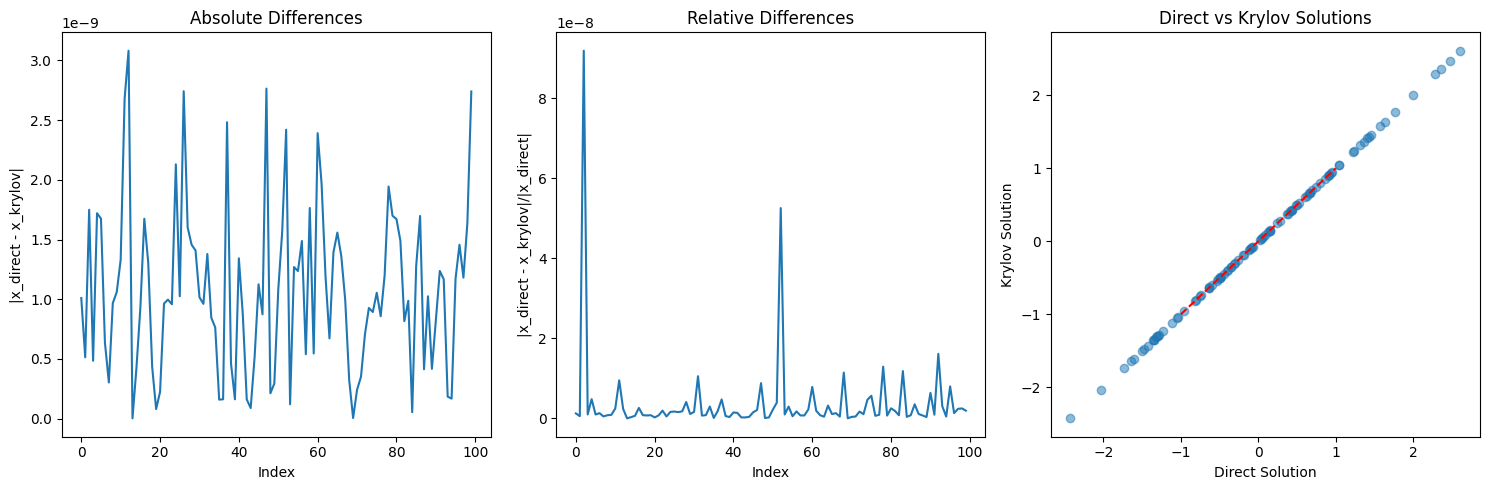

In [12]:
analyze_solutions(x_direct, x_krylov)